# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint: expand the squares, and rebuild the quadratic in terms of $\theta$...


$$\text{exp}\left\{-\frac{1}{2}\left(\left(\sum^n_{i=1}\phi(x_i-\theta)^2\right)+\tau(\theta-\theta_0)^2\right)\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}(x_i^2-2x_i\theta+\theta^2)+\tau(\theta^2-2\theta\theta_0+\theta_0^2)\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}x_i^2-2\theta\phi\sum^n_{i=1}x_i+n\phi\theta^2+\tau\theta^2-2\tau\theta\theta_0+\tau\theta_0^2\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)+\phi\sum^n_{i=1}x_i^2+\tau\theta_0^2\right]\right\}$$
$$\propto\text{exp}\left\{-\frac{1}{2}\left[\left(n\phi\theta^2+\tau\theta^2\right)+(-2\theta\phi\sum^n_{i=1}x_i-2\tau\theta\theta_0)\right]\right\}\text{as the latter two terms are irrelevant to }\theta$$
$$=\text{exp}\left\{-\frac{1}{2}\left[(\tau+n\phi)\theta^2-2\theta(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}(\tau+n\phi)\left[\theta^2-\frac{2\theta}{\tau+n\phi}(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\}$$
$$\propto\text{exp}\left\{-\frac{1}{2}(\tau+n\phi)\left[\theta^2-\frac{2\theta}{\tau+n\phi}(\tau\theta_0+\phi\sum^n_{i=1}x_i)+\frac{1}{(\tau+n\phi)^2}(\tau\theta_0+\phi\sum^n_{i=1}x_i)^2\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}(\tau+n\phi)\left[\theta-\frac{1}{\tau+n\phi}(\tau\theta_0+\phi\sum^n_{i=1}x_i)\right]\right\}\blacksquare$$

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** pdiscussed below] and ***marginal likelihood constants***?

<!-- posterior proporitional to joint... --> 


## Question 1. Plotting individual likelihoods
The following graph plots the individual likelihoods (three likelihoods for $n=3$) plus the prior, joint, and posterior distribution.

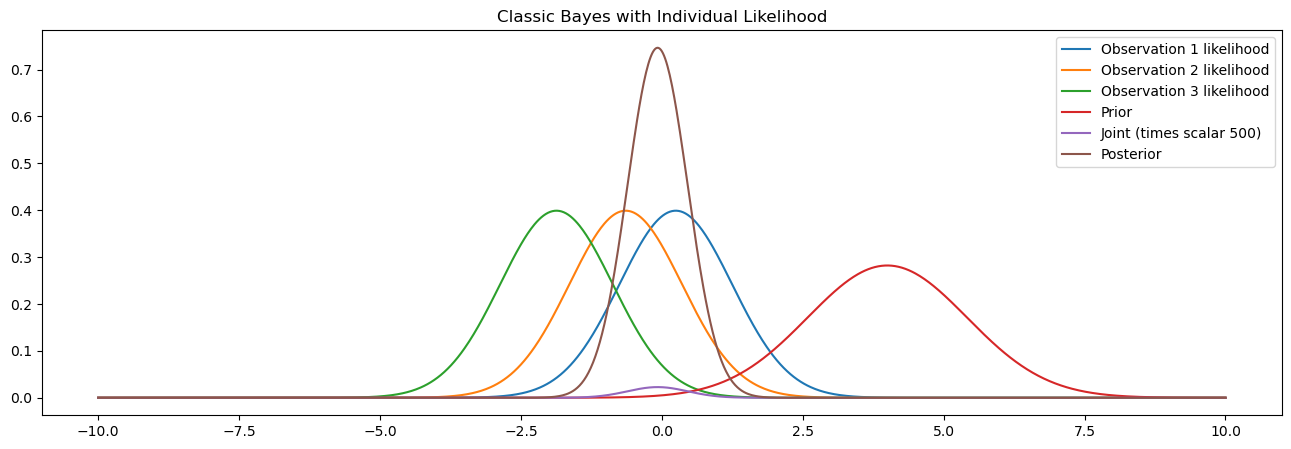

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(1006668633) # Set seed
n = 3
x = stats.norm(loc=0, scale=1).rvs(n) # variance = standard deviation = precision = 1
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)
individual_likelihoods = np.zeros((n, len(parameter_domain))) # A new array filled with zeros

for i in range(n):
    individual_likelihoods[i] = stats.norm.pdf(x[i], loc = parameter_domain, scale = 1)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) 
joint = individual_likelihoods[0]*individual_likelihoods[1]*individual_likelihoods[2]*prior*500
posterior = stats.norm(loc = (tau * theta_0 + x.sum()) / (tau + n), scale = 1/ (tau + n)**0.5).pdf(parameter_domain)
# Start Plotting
plt.figure(figsize=(16, 5))
for i in range(n):
    plt.plot(parameter_domain, individual_likelihoods[i], label = "Observation " + str(i + 1) + " likelihood")
plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, joint, label="Joint (times scalar 500)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.legend()
plt.title("Classic Bayes with Individual Likelihood")
plt.show() # remove unnecessary output

## Question 2. Log Scale

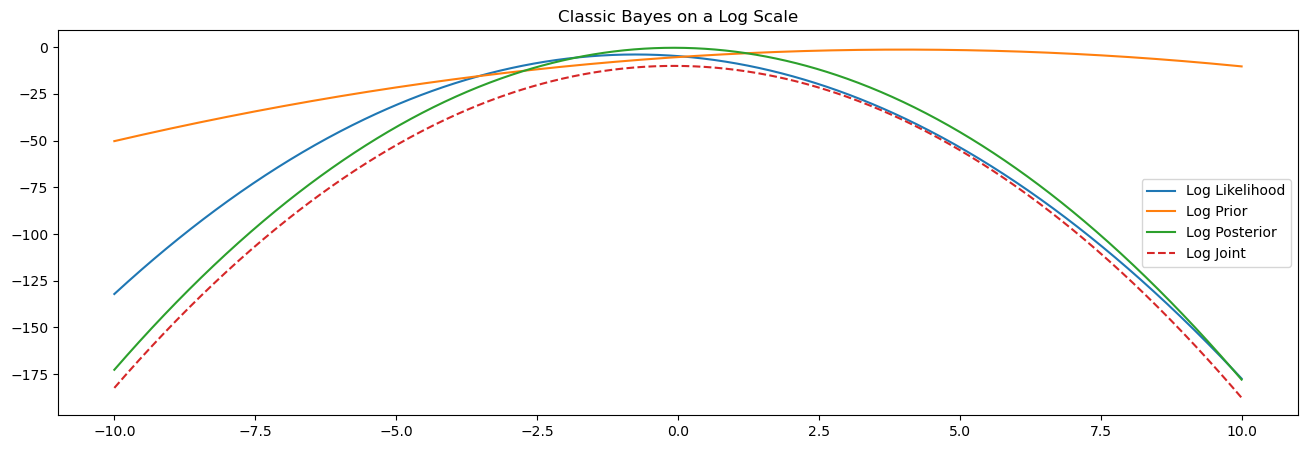

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(1006668633) # Set seed
n = 3; x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape),
                            loc=parameter_domain, scale=1).sum(axis=0) # sigma=1 known, change to sum due to log
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?

joint = likelihood+prior # addition due to the log operation
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood, label="Log Likelihood")
plt.plot(parameter_domain, prior, label="Log Prior")
plt.plot(parameter_domain, posterior, label="Log Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Log Joint")
plt.legend()
plt.title("Classic Bayes on a Log Scale")
plt.show()

## Question 3. Posterior Distribution of a Normal Likelihood with $p(\theta)\propto1$
The posterior distribution of a normal likelihood with $p(\theta)\propto1$ would still be normal. The exact formula derivation is given as follow:

$$p(\theta|x) \propto{} p(\theta,x) = p(x|\theta)p(\theta)$$
$$=\left[\prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}}\right]\times{c}\text{ for some constant c}$$
$$\propto\exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)\right]$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}(x_i^2-2x_i\theta+\theta^2)\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}\left[\phi\sum^n_{i=1}x_i^2-2\theta\phi\sum^n_{i=1}x_i+n\phi\theta^2\right]\right\}$$
$$\propto\text{exp}\left\{-\frac{1}{2}\left[n\phi\theta^2-2\theta\phi\sum^n_{i=1}x_i\right]\right\}\text{as the first term is irrelevant to }\theta$$
$$\propto\text{exp}\left\{-\frac{1}{2}n\phi\left[\theta^2-\frac{2\theta}{n}\sum^n_{i=1}x_i+\frac{1}{n^2}(\sum^n_{i=1}x_i)^2\right]\right\}$$
$$=\text{exp}\left\{-\frac{1}{2}n\phi\left[\theta-\frac{1}{n}\sum^n_{i=1}x_i\right]^2\right\}\blacksquare$$
The result is a normal distribution with mean $\frac{1}{n}\sum^n_{i=1}x_i$ and precision $n\phi$.

## Question 4. Difference between Log Likelihood and Log Posterior
Since the formula for deriving posterior distribution is as follow:
$$p(\theta|x)=\frac{p(x|\theta)p(\theta)}{p(x)}$$
where likelihood is $p(x|\theta)$, and the posterior as $p(\theta|x)$.

It follows that with an improper prior, applying log operation to the previous formula would result in the following:
$$log[p(\theta|x)]=log\left[\frac{p(x|\theta)p(\theta)}{p(x)}\right]\\
\rightarrow{log}(p(\theta|x))=log(p(x|\theta))+log(p(\theta))-log(p(x))$$
Since an improper prior is used, $log(p(\theta))$ can be considered to be infinitly small, and thus omitted for direct computation, then:
$$log(p(\theta|x))=log(p(x|\theta))-log(p(x))$$
where the log likelihood and log posterior are simply different in the **log of the marginal likelihood constant**.